In [23]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data from the JSON file
with open('films_data.json', 'r') as f:
    films_data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(films_data)
#df.drop(['title'], axis=1, inplace=True)


# Filter the data to include only comedies and horrors
filtered_df = df[df['genre'].isin(['Comedia', 'Terror'])]
filtered_df=filtered_df.drop(['title'], axis=1)
filtered_df




,genre,synopsis
0,Comedia,Una bella estudiante muere asesinada. Un grupo...
3,Comedia,Un sacerdote cree haber descifrado el mensaje ...
4,Comedia,"En un mundo plagado de zombis, Columbus (Jesse..."
5,Comedia,"Julia (Carmen Maura), una mujer madura que tra..."
6,Comedia,Una comedia romántica... con zombies. La vida ...
...,...,...
290,Terror,"Seymour Krelboin (Jonathan Haze), un joven dep..."
291,Comedia,Una nueva entrega de la franquicia que parodia...
292,Comedia,"Viago, Deacon y Vladislav son tres vampiros qu..."
294,Comedia,"R, un zombi con problemas existenciales, entab..."


In [24]:
filtered_df["genre"].value_counts(normalize=True)

Comedia    0.722222
Terror     0.277778
Name: genre, dtype: float64

In [25]:
synopsis = filtered_df["synopsis"]
genre = filtered_df["genre"]
synopsis_train, synopsis_test, genre_train, genre_test = train_test_split(
    synopsis, genre, test_size=0.1, random_state=30)


In [26]:
vectorizador = CountVectorizer(stop_words="english")
synopsis_train_vector = vectorizador.fit_transform(synopsis_train)
synopsis_test_vector = vectorizador.transform(synopsis_test)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
clf = LogisticRegression()
clf.fit(synopsis_train_vector, genre_train)


LogisticRegression()

In [28]:
preds = clf.predict(synopsis_test_vector)
print(classification_report(genre_test, preds,
      target_names=['Comedia', 'Horror']))


              precision    recall  f1-score   support

     Comedia       1.00      1.00      1.00        14
      Horror       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



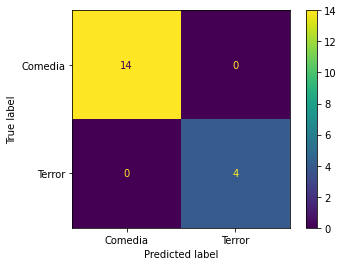

In [29]:
plot_confusion_matrix(clf, synopsis_test_vector, genre_test)


In [30]:
# dump el clasificador
import pickle
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)
